# Use sklearn Random Forest

Kaggle dataset: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

In [1]:
%load_ext jupyter_black

In [2]:
import polars as pl
from sklearn.preprocessing import LabelEncoder

### Read the test dataset

In [3]:
df = pl.read_csv("../../data/students performance in exams/exams.csv")
df

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""male""","""group A""","""high school""","""standard""","""completed""",67,67,63
"""female""","""group D""","""some high school""","""free/reduced""","""none""",40,59,55
"""male""","""group E""","""some college""","""free/reduced""","""none""",59,60,50
"""male""","""group B""","""high school""","""standard""","""none""",77,78,68
"""male""","""group E""","""associate's degree""","""standard""","""completed""",78,73,68
…,…,…,…,…,…,…,…
"""male""","""group C""","""high school""","""standard""","""none""",73,70,65
"""male""","""group D""","""associate's degree""","""free/reduced""","""completed""",85,91,92
"""female""","""group C""","""some high school""","""free/reduced""","""none""",32,35,41


In [4]:
# Create a new DataFrame that shows the null counts per column
df.null_count()

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


In [5]:
# Get a mask of all duplicated rows in this DataFrame and filter so we see just the duplicate records.
df.filter(df.is_duplicated())

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""male""","""group E""","""associate's degree""","""standard""","""completed""",100,100,100
"""male""","""group E""","""associate's degree""","""standard""","""completed""",100,100,100


In [6]:
# Drop duplicate rows from this dataframe, returning a new dataframe.
df = df.unique(maintain_order=True)
df

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,i64,i64,i64
"""male""","""group A""","""high school""","""standard""","""completed""",67,67,63
"""female""","""group D""","""some high school""","""free/reduced""","""none""",40,59,55
"""male""","""group E""","""some college""","""free/reduced""","""none""",59,60,50
"""male""","""group B""","""high school""","""standard""","""none""",77,78,68
"""male""","""group E""","""associate's degree""","""standard""","""completed""",78,73,68
…,…,…,…,…,…,…,…
"""male""","""group C""","""high school""","""standard""","""none""",73,70,65
"""male""","""group D""","""associate's degree""","""free/reduced""","""completed""",85,91,92
"""female""","""group C""","""some high school""","""free/reduced""","""none""",32,35,41


In [7]:
# Display summary statistics for the data
df.describe()

statistic,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
str,str,str,str,str,str,f64,f64,f64
"""count""","""999""","""999""","""999""","""999""","""999""",999.0,999.0,999.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",null,null,null,null,null,66.362362,68.970971,67.705706
"""std""",null,null,null,null,null,15.373794,14.711935,15.575322
"""min""","""female""","""group A""","""associate's degree""","""free/reduced""","""completed""",13.0,27.0,23.0
"""25%""",null,null,null,null,null,56.0,60.0,58.0
"""50%""",null,null,null,null,null,66.0,70.0,68.0
"""75%""",null,null,null,null,null,77.0,79.0,79.0
"""max""","""male""","""group E""","""some high school""","""standard""","""none""",100.0,100.0,100.0


[Text(0.5, 1.0, 'Math Score')]

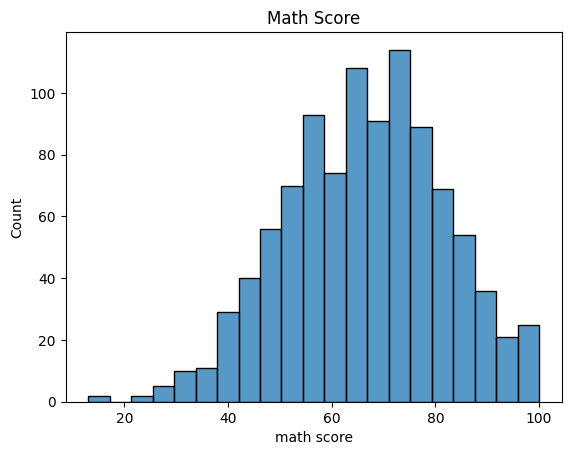

In [8]:
# Display a histogram of math scores
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=(df), x="math score").set(title="Math Score")

[Text(0.5, 1.0, 'Reading Score')]

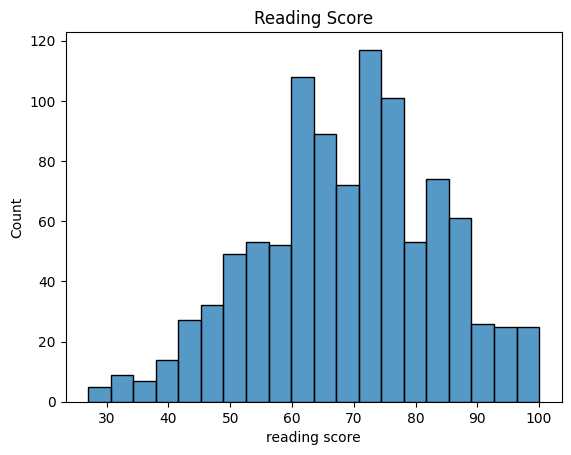

In [9]:
# Display a histogram of reading scores
sns.histplot(data=(df), x="reading score").set(title="Reading Score")

[Text(0.5, 1.0, 'Writing Score')]

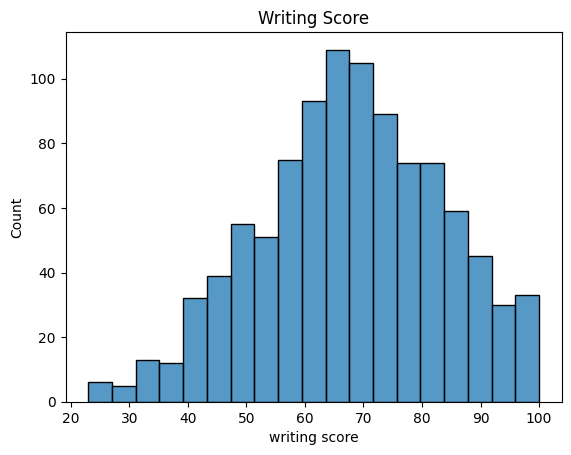

In [10]:
# Display a histogram of writing scores
sns.histplot(data=(df), x="writing score").set(title="Writing Score")

<Axes: ylabel='math score'>

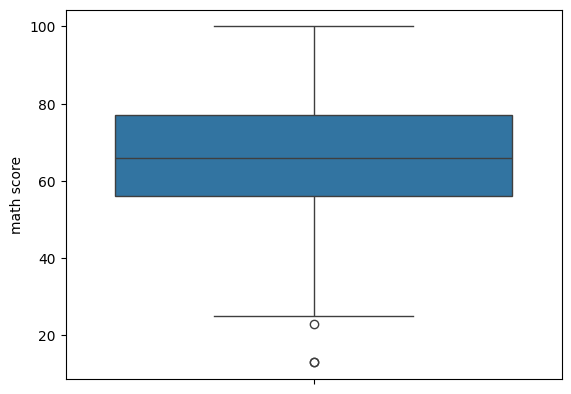

In [11]:
# show a boxplot of math scores
sns.boxplot(
    data=df,
    y="math score",
)

<Axes: ylabel='reading score'>

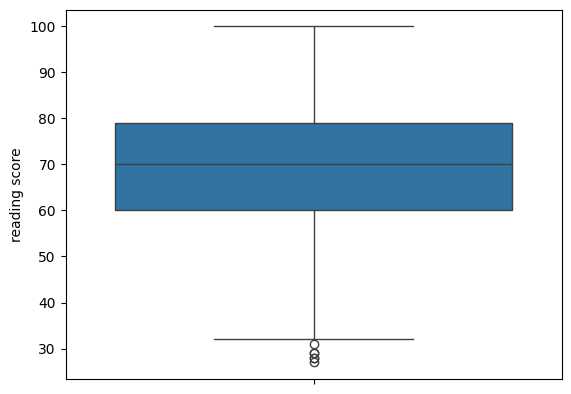

In [12]:
# show a boxplot of reading scores
sns.boxplot(
    data=df,
    y="reading score",
)

<Axes: ylabel='writing score'>

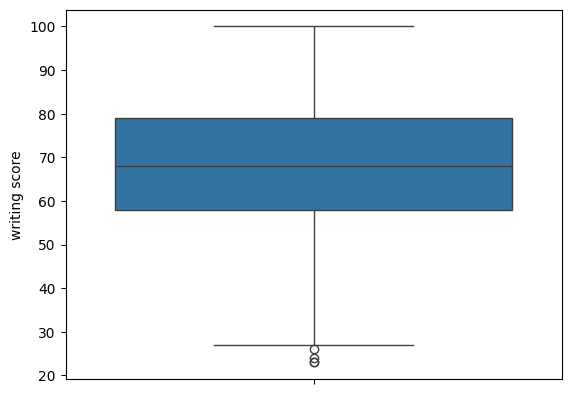

In [13]:
# show a boxplot of writing scores
sns.boxplot(
    data=df,
    y="writing score",
)

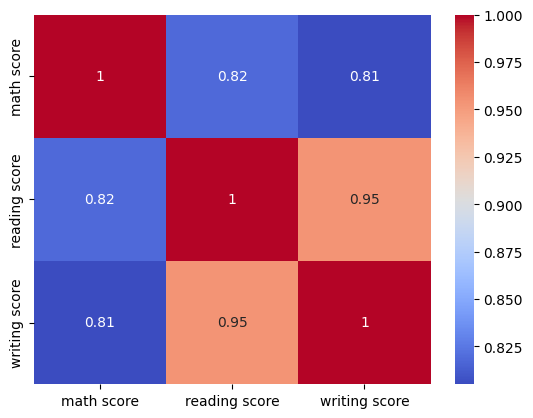

In [14]:
# show a heatmap of the math, reading and writing scores
sns.heatmap(
    df.select(["math score", "reading score", "writing score"]).corr(),
    annot=True,
    cmap="coolwarm",
    xticklabels=["math score", "reading score", "writing score"],
    yticklabels=["math score", "reading score", "writing score"],
);

In [15]:
# inspect the schema
df.schema

Schema([('gender', String),
        ('race/ethnicity', String),
        ('parental level of education', String),
        ('lunch', String),
        ('test preparation course', String),
        ('math score', Int64),
        ('reading score', Int64),
        ('writing score', Int64)])

In [16]:
# encode the string values
labelencoder = LabelEncoder()

# get the names of the string columns
columns_to_encode = [col.name for col in df.iter_columns() if col.dtype == pl.String]

# create new columns to hold the encoded values of the string columns
pl_series = [
    pl.Series(feature + "_num", labelencoder.fit_transform(df[feature]))
    for feature in columns_to_encode
]

# create a new dataframe that contains all the original columns, plus the encoded
df_2 = df.with_columns(pl_series)
df_2

gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_num,race/ethnicity_num,parental level of education_num,lunch_num,test preparation course_num
str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64
"""male""","""group A""","""high school""","""standard""","""completed""",67,67,63,1,0,2,1,0
"""female""","""group D""","""some high school""","""free/reduced""","""none""",40,59,55,0,3,5,0,1
"""male""","""group E""","""some college""","""free/reduced""","""none""",59,60,50,1,4,4,0,1
"""male""","""group B""","""high school""","""standard""","""none""",77,78,68,1,1,2,1,1
"""male""","""group E""","""associate's degree""","""standard""","""completed""",78,73,68,1,4,0,1,0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""male""","""group C""","""high school""","""standard""","""none""",73,70,65,1,2,2,1,1
"""male""","""group D""","""associate's degree""","""free/reduced""","""completed""",85,91,92,1,3,0,0,0
"""female""","""group C""","""some high school""","""free/reduced""","""none""",32,35,41,0,2,5,0,1


In [17]:
# select just the integer columns

df_2 = df_2.select([col.name for col in df_2.iter_columns() if col.dtype == pl.Int64])
df_2

math score,reading score,writing score,gender_num,race/ethnicity_num,parental level of education_num,lunch_num,test preparation course_num
i64,i64,i64,i64,i64,i64,i64,i64
67,67,63,1,0,2,1,0
40,59,55,0,3,5,0,1
59,60,50,1,4,4,0,1
77,78,68,1,1,2,1,1
78,73,68,1,4,0,1,0
…,…,…,…,…,…,…,…
73,70,65,1,2,2,1,1
85,91,92,1,3,0,0,0
32,35,41,0,2,5,0,1


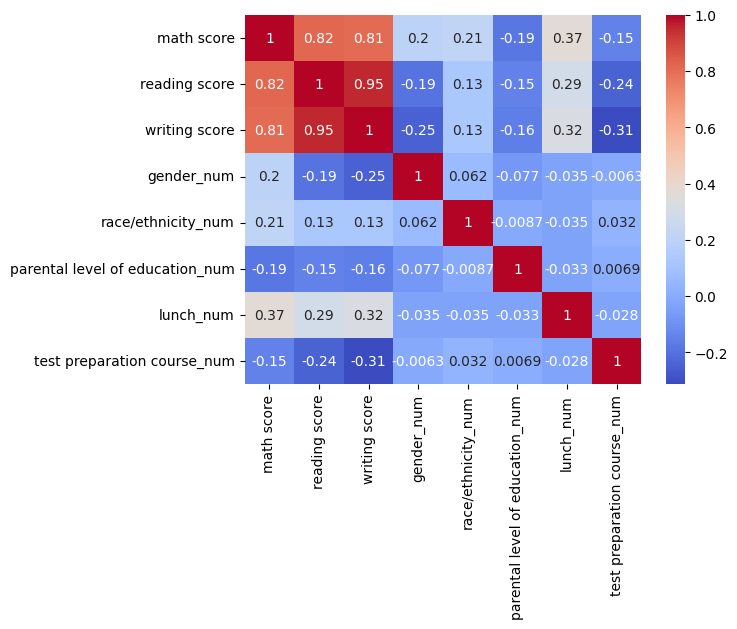

In [18]:
# show a heatmap of all data
columns_names = [col.name for col in df_2.iter_columns()]

sns.heatmap(
    df_2.corr(),
    annot=True,
    cmap="coolwarm",
    xticklabels=columns_names,
    yticklabels=columns_names,
);

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(
    n_estimators=1000,
    random_state=42,
    max_depth=50,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features=1.0,
)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  160.54944141071243
RMSE:  12.670810605904913
R2 score:  0.3255442996765082


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    max_depth=50,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  162.98391350239305
RMSE:  12.766515323391621
R2 score:  0.3153172720077413


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=1.0,
)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  160.7100736652691
RMSE:  12.677147694385717
R2 score:  0.3248694960846078


### Try GridSearchCV with params:
{
    "n_estimators": [100, 200, 300],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

In [22]:
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

math_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    refit=True,
)

math_grid_search.fit(X_train, y_train)

print(math_grid_search.best_params_)
print(math_grid_search.best_estimator_)

{'bootstrap': True, 'criterion': 'absolute_error', 'n_estimators': 200}
RandomForestRegressor(criterion='absolute_error', n_estimators=200,
                      random_state=42)


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(random_state=42, **math_grid_search.best_params_)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  172.88748028125002
RMSE:  13.148668384336492
R2 score:  0.2737131592257658


### Try GridSearchCV with neg_mean_squared_error and params:
{
    "n_estimators": [100, 200, 300],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

In [24]:
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

math_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    refit=True,
)

math_grid_search.fit(X_train, y_train)

print(math_grid_search.best_params_)
print(math_grid_search.best_estimator_)

{'bootstrap': True, 'criterion': 'absolute_error', 'n_estimators': 200}
RandomForestRegressor(criterion='absolute_error', n_estimators=200,
                      random_state=42)


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(random_state=42, **math_grid_search.best_params_)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  172.88748028125002
RMSE:  13.148668384336492
R2 score:  0.2737131592257658


### Try GridSearchCV with params:
{
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": ["sqrt", "log2", 1.0],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error"],
    "ccp_alpha": [0.0, 0.01],
}

In [26]:
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": ["sqrt", "log2", 1.0],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error"],
    "ccp_alpha": [0.0, 0.01],
}

math_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    # cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    refit=True,
)

math_grid_search.fit(X_train, y_train)

print(math_grid_search.best_params_)
print(math_grid_search.best_estimator_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_features': 1.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}
RandomForestRegressor(min_samples_leaf=10, n_estimators=300, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(random_state=42, **math_grid_search.best_params_)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  160.6215046487637
RMSE:  12.67365395806449
R2 score:  0.32524156762549417


### Try RandomizedSearchCV with params:
{
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": ["sqrt", "log2", 1.0],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error"],
    "ccp_alpha": [0.0, 0.01],
}

In [28]:
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": ["sqrt", "log2", 1.0],
    "bootstrap": [True, False],
    "criterion": ["squared_error", "absolute_error"],
    "ccp_alpha": [0.0, 0.01],
}

math_grid_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    # cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    refit=True,
)

math_grid_search.fit(X_train, y_train)

print(math_grid_search.best_params_)
print(math_grid_search.best_estimator_)

{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'criterion': 'absolute_error', 'ccp_alpha': 0.0, 'bootstrap': True}
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      min_samples_leaf=10, min_samples_split=10,
                      n_estimators=300, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(random_state=42, **math_grid_search.best_params_)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  161.32330905555554
RMSE:  12.701311312441543
R2 score:  0.3222933419666951


In [30]:
import seaborn as sns
import pandas as pd

results = pd.DataFrame(math_grid_search.cv_results_)
results
# sns.heatmap(results.pivot("param_max_depth", "param_min_samples_split", "mean_test_score"))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_criterion,param_ccp_alpha,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151137,0.015538,0.013407,0.000850,100,5,1,sqrt,squared_error,0.01,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",-217.459043,-221.943633,-215.715682,-188.974341,-260.325157,-220.883571,22.862178,10
1,0.312413,0.010735,0.022842,0.002556,100,10,10,log2,absolute_error,0.01,True,"{'n_estimators': 100, 'min_samples_split': 10,...",-174.734902,-177.870303,-180.580682,-144.028488,-201.768682,-175.796611,18.504469,2
2,0.754798,0.056541,0.051864,0.003795,200,10,1,log2,absolute_error,0.00,True,"{'n_estimators': 200, 'min_samples_split': 10,...",-174.137681,-184.835532,-184.097827,-154.834678,-211.983627,-181.977869,18.499878,4
3,0.937552,0.020089,0.041053,0.006145,200,20,1,sqrt,absolute_error,0.00,False,"{'n_estimators': 200, 'min_samples_split': 20,...",-174.530860,-181.102646,-184.992222,-154.468366,-217.675934,-182.554006,20.468391,5
4,1.671729,0.034635,0.021156,0.003721,200,5,2,1.0,absolute_error,0.01,False,"{'n_estimators': 200, 'min_samples_split': 5, ...",-203.445591,-219.095940,-212.011859,-180.973780,-267.840364,-216.673507,28.618507,9
5,0.344505,0.055925,0.043605,0.010579,200,2,4,log2,squared_error,0.00,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",-184.776484,-188.474664,-190.231511,-164.052072,-220.507155,-189.608377,18.071414,6
6,0.960719,0.023341,0.031908,0.003215,300,10,10,log2,absolute_error,0.00,True,"{'n_estimators': 300, 'min_samples_split': 10,...",-174.903361,-176.417160,-182.058651,-143.275627,-201.356038,-175.602167,18.714197,1
7,0.261377,0.016257,0.029414,0.006114,100,2,1,sqrt,squared_error,0.01,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",-210.129434,-217.443953,-204.315136,-188.184669,-254.077511,-214.830140,21.862439,8
8,0.223319,0.020299,0.019738,0.007540,100,10,2,sqrt,squared_error,0.01,True,"{'n_estimators': 100, 'min_samples_split': 10,...",-176.890594,-181.593592,-182.398431,-155.911073,-211.031208,-181.564979,17.600721,3
9,0.176387,0.026067,0.013261,0.001620,100,20,1,1.0,squared_error,0.01,False,"{'n_estimators': 100, 'min_samples_split': 20,...",-192.309246,-185.314432,-191.604472,-181.305597,-214.192434,-192.945236,11.378540,7


In [31]:
pivot_table = results.pivot_table(
    values="mean_test_score",
    index="param_criterion",
    columns="param_min_samples_split",
)
pivot_table

param_min_samples_split,2,5,10,20
param_criterion,,,,
absolute_error,NaN,-216.673507,-177.792216,-182.554006
squared_error,-202.219259,-220.883571,-181.564979,-192.945236


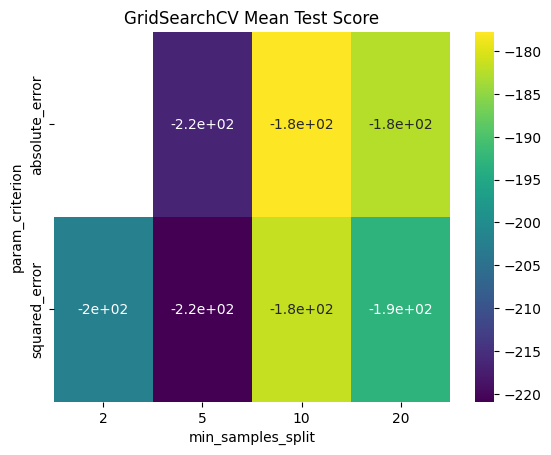

In [32]:
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("GridSearchCV Mean Test Score")
plt.xlabel("min_samples_split")
plt.ylabel("param_criterion")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.mstats import winsorize

import math

a_np = df_2["math score"].to_numpy()
winsorized = winsorize(a_np, limits=[0.1, 0.2])

df_3 = df_2.with_columns(pl.Series("math score", winsorized.data))

# split data into train and test sets
X = df_3.drop(["math score", "reading score", "writing score"])
y = df_3["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(
    bootstrap=True,
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features=1.0,
)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  96.33658651908958
RMSE:  9.815120300795583
R2 score:  0.301235853085402


In [34]:
math_grid_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'criterion': 'absolute_error',
 'ccp_alpha': 0.0,
 'bootstrap': True}

In [35]:
math_grid_search.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      min_samples_leaf=10, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import math

# split data into train and test sets
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["math score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the math score
rf_math_score = RandomForestRegressor(
    bootstrap=True,
    n_estimators=100,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    ccp_alpha=0.0,
    criterion="squared_error",
)

# Train the model
rf_math_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_math_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

print("RMSE: ", math.sqrt(mse))

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  173.3925193732474
RMSE:  13.167859331464907
R2 score:  0.2715915293310067


In [38]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
)

accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy_score: ", accuracy_score)

precision_score = precision_score(y_test, y_pred, average="micro")
print("Precision_score: ", precision_score)

f1_score = f1_score(y_test, y_pred, average="micro")
print("f1_score: ", f1_score)

print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

([<matplotlib.axis.XTick at 0x1a3a49a60f0>,
 [Text(0, 0, 'gender_num'),
  Text(1, 0, 'race/ethnicity_num'),
  Text(2, 0, 'parental level of education_num'),
  Text(3, 0, 'lunch_num'),
  Text(4, 0, 'test preparation course_num')])

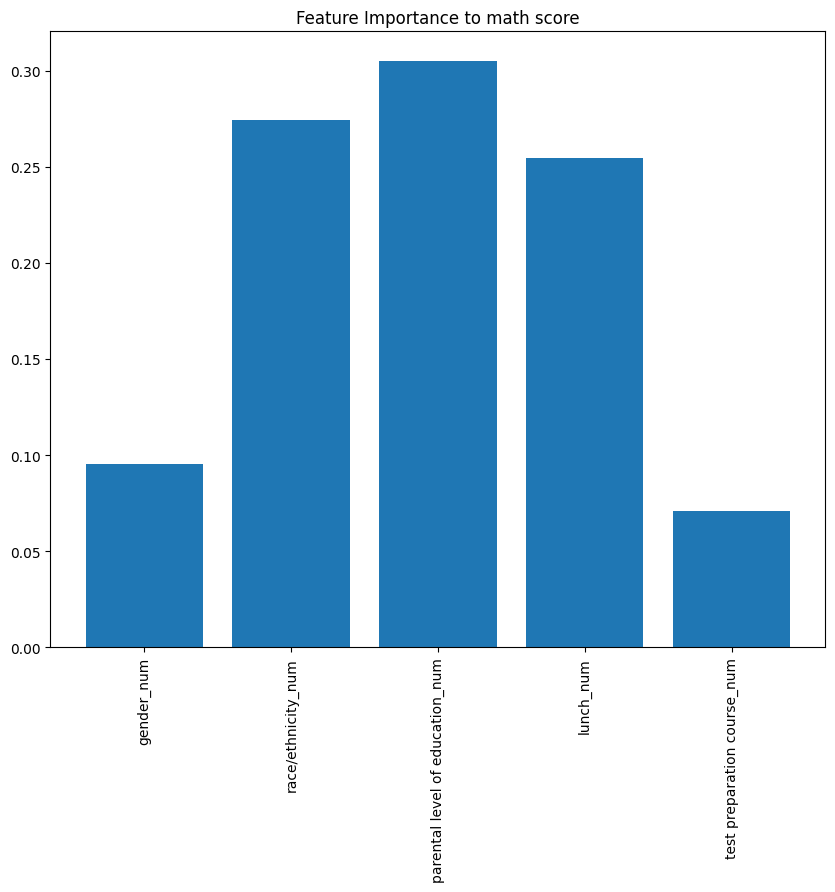

In [39]:
# plot feature importance
columns_names = [col.name for col in X.iter_columns()]
importances = rf_math_score.feature_importances_
indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.title("Feature Importance to math score")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), columns_names, rotation=90)

In [40]:
# train model on with other class
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["reading score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the reading score
rf_reading_score = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reading_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_reading_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# calculate r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  181.80634911677762
R2 score:  0.17408615862726085


([<matplotlib.axis.XTick at 0x1a3a62deb70>,
 [Text(0, 0, 'gender_num'),
  Text(1, 0, 'race/ethnicity_num'),
  Text(2, 0, 'parental level of education_num'),
  Text(3, 0, 'lunch_num'),
  Text(4, 0, 'test preparation course_num')])

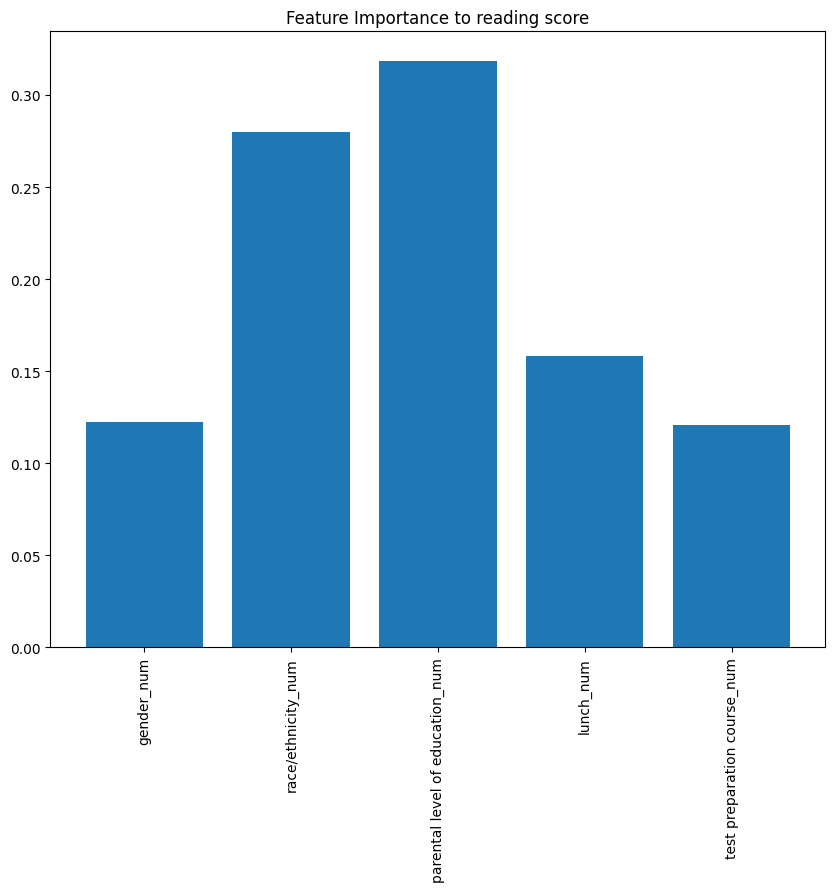

In [41]:
# plot feature importance
columns_names = [col.name for col in X.iter_columns()]
importances = rf_reading_score.feature_importances_
indices = [0, 1, 2, 3, 4]
plt.figure(figsize=(10, 8))
plt.title("Feature Importance to reading score")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), columns_names, rotation=90)

In [42]:
# train model on with other class
X = df_2.drop(["math score", "reading score", "writing score"])
y = df_2["writing score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# instantiate the random forest for the writing score
rf_writing_score = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_writing_score.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_writing_score.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error: ", mse)
# calculate r2 score

r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Mean squared error:  165.09060195702858
R2 score:  0.32528995043897535


([<matplotlib.axis.XTick at 0x1a3a757eb70>,
 [Text(0, 0, 'gender_num'),
  Text(1, 0, 'race/ethnicity_num'),
  Text(2, 0, 'parental level of education_num'),
  Text(3, 0, 'lunch_num'),
  Text(4, 0, 'test preparation course_num')])

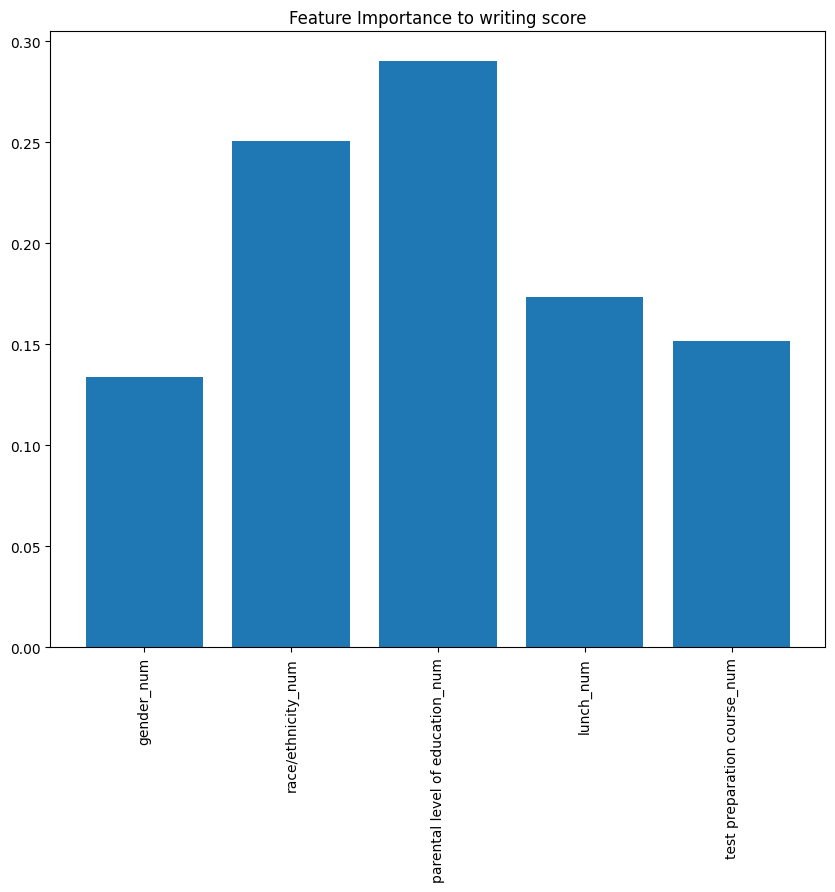

In [43]:
# plot feature importance
columns_names = [col.name for col in X.iter_columns()]
importances = rf_writing_score.feature_importances_
indices = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 8))
plt.title("Feature Importance to writing score")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), columns_names, rotation=90)

["associate's degree", 'high school', "master's degree", 'some college', "bachelor's degree", 'some high school']


Text(0.5, 1.0, 'Math scores between Parental levels of education')

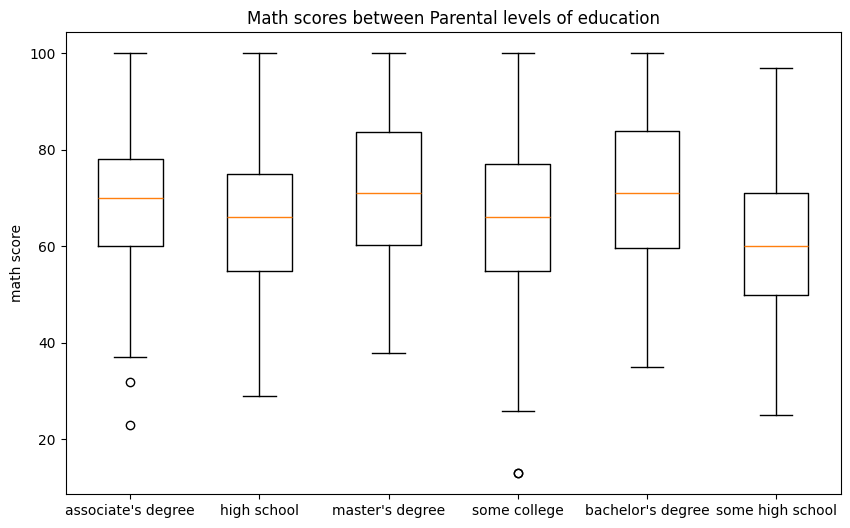

In [44]:
score_name = "math score"
parental_education_values = [
    v
    for v in (
        df.select(["parental level of education"])
        .unique()["parental level of education"]
        .to_list()
    )
]

print(parental_education_values)

education_data = [
    df.filter(pl.col("parental level of education").eq(pl.lit(education)))[
        score_name
    ].to_list()
    for education in parental_education_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(education_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(parental_education_values)
ax.set_title("Math scores between Parental levels of education")

Text(0.5, 1.0, 'Reading scores between Parental levels of education')

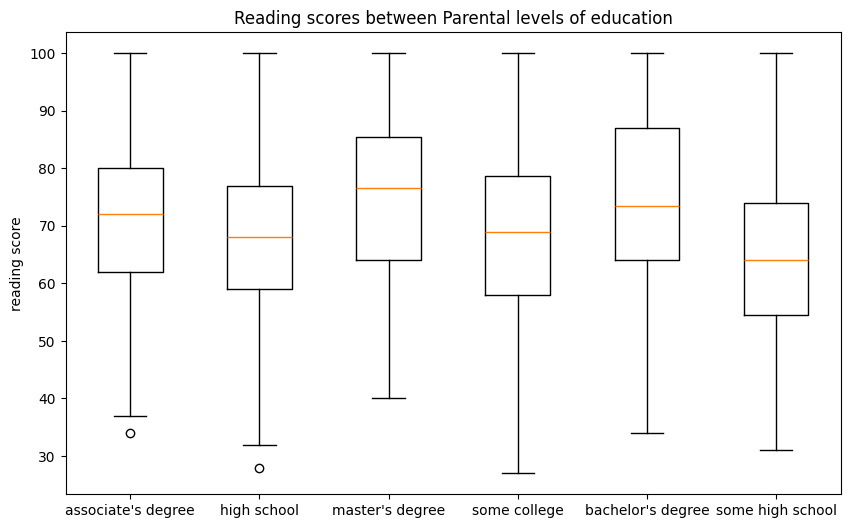

In [45]:
score_name = "reading score"
education_data = [
    df.filter(pl.col("parental level of education").eq(pl.lit(education)))[
        score_name
    ].to_list()
    for education in parental_education_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(education_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(parental_education_values)
ax.set_title("Reading scores between Parental levels of education")

Text(0.5, 1.0, 'Writing scores between Parental levels of education')

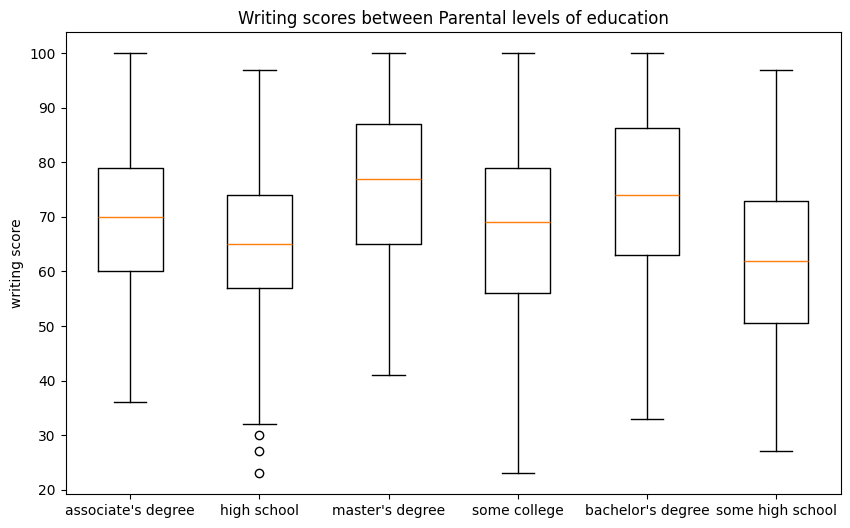

In [46]:
score_name = "writing score"
education_data = [
    df.filter(pl.col("parental level of education").eq(pl.lit(education)))[
        score_name
    ].to_list()
    for education in parental_education_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(education_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(parental_education_values)
ax.set_title("Writing scores between Parental levels of education")

['free/reduced', 'standard']


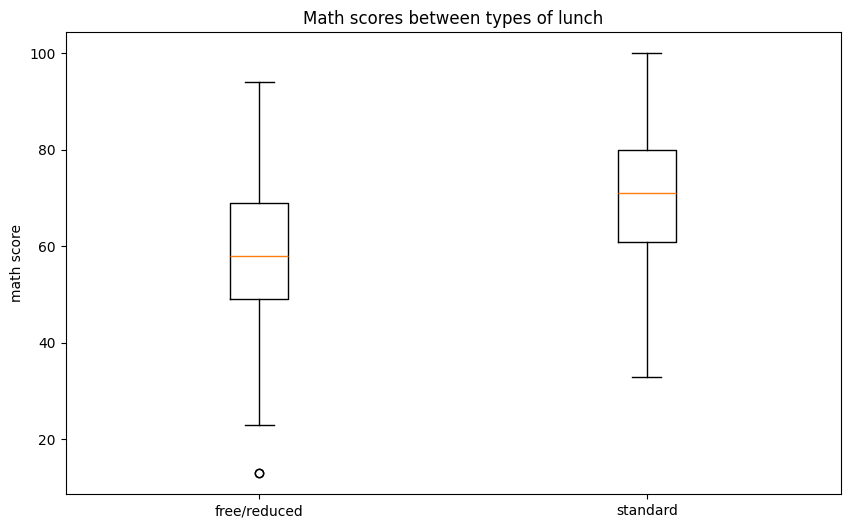

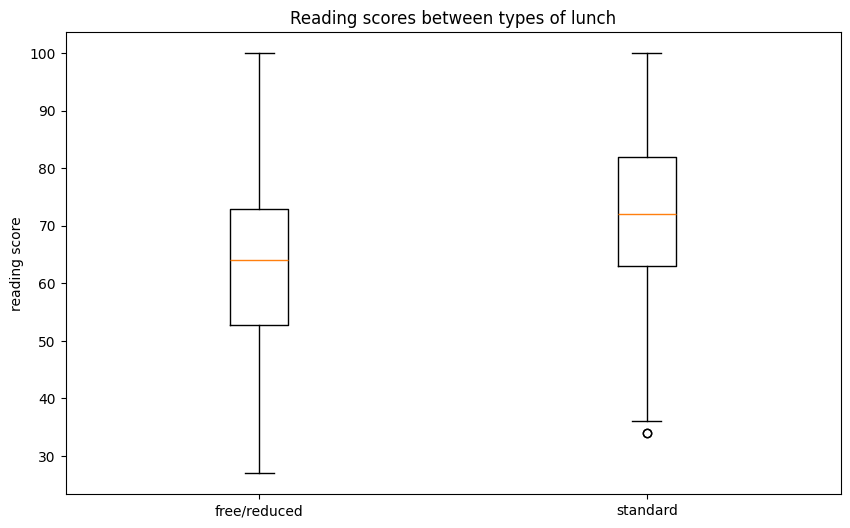

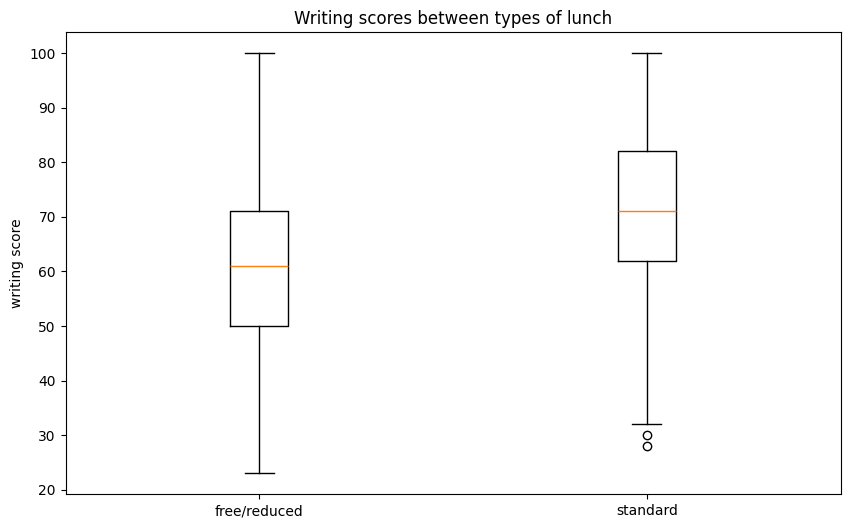

In [47]:
score_name = "math score"
lunch_values = [v for v in (df.select(["lunch"]).unique()["lunch"].to_list())]

print(lunch_values)

lunch_data = [
    df.filter(pl.col("lunch").eq(pl.lit(lunch)))[score_name].to_list()
    for lunch in lunch_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(lunch_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(lunch_values)
ax.set_title("Math scores between types of lunch")
plt.show()


score_name = "reading score"
lunch_data = [
    df.filter(pl.col("lunch").eq(pl.lit(lunch)))[score_name].to_list()
    for lunch in lunch_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(lunch_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(lunch_values)
ax.set_title("Reading scores between types of lunch")
plt.show()


score_name = "writing score"
lunch_data = [
    df.filter(pl.col("lunch").eq(pl.lit(lunch)))[score_name].to_list()
    for lunch in lunch_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(lunch_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(lunch_values)
ax.set_title("Writing scores between types of lunch")
plt.show()

['group A', 'group D', 'group B', 'group C', 'group E']


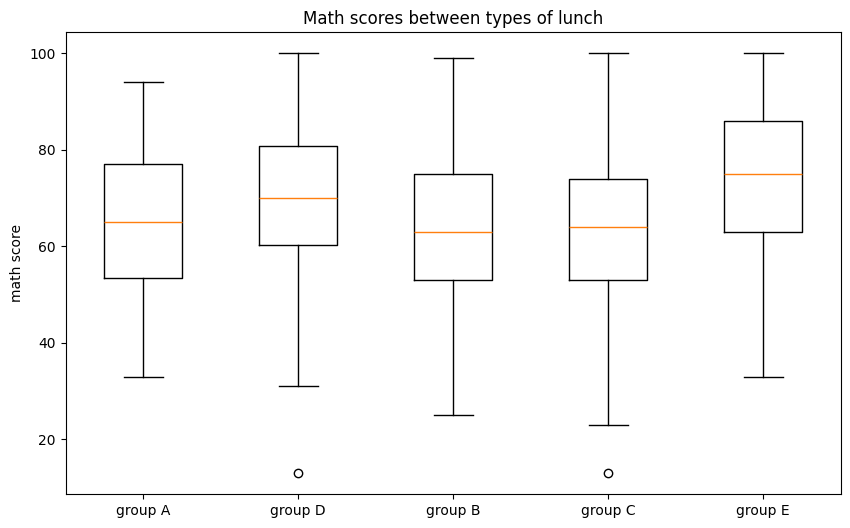

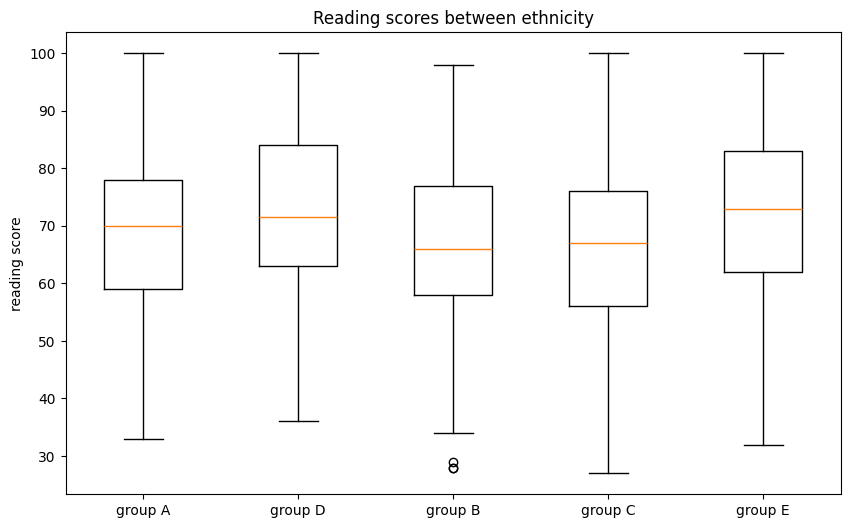

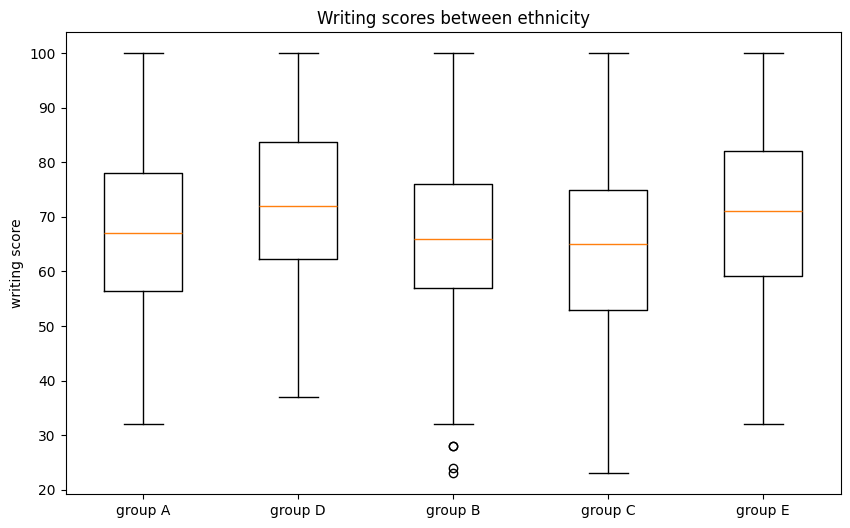

In [48]:
score_name = "math score"
ethnicity_values = [
    v for v in (df.select(["race/ethnicity"]).unique()["race/ethnicity"].to_list())
]

print(ethnicity_values)

ethnicity_data = [
    df.filter(pl.col("race/ethnicity").eq(pl.lit(ethnicity)))[score_name].to_list()
    for ethnicity in ethnicity_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ethnicity_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(ethnicity_values)
ax.set_title("Math scores between types of lunch")
plt.show()


score_name = "reading score"
ethnicity_data = [
    df.filter(pl.col("race/ethnicity").eq(pl.lit(ethnicity)))[score_name].to_list()
    for ethnicity in ethnicity_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ethnicity_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(ethnicity_values)
ax.set_title("Reading scores between ethnicity")
plt.show()


score_name = "writing score"
ethnicity_data = [
    df.filter(pl.col("race/ethnicity").eq(pl.lit(ethnicity)))[score_name].to_list()
    for ethnicity in ethnicity_values
]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ethnicity_data, vert=True)
ax.set_ylabel(score_name)
ax.set_xticklabels(ethnicity_values)
ax.set_title("Writing scores between ethnicity")
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index(['gender_num', 'race/ethnicity_num', 'parental level of education_num',
       'lunch_num', 'test preparation course_num'],
      dtype='object')


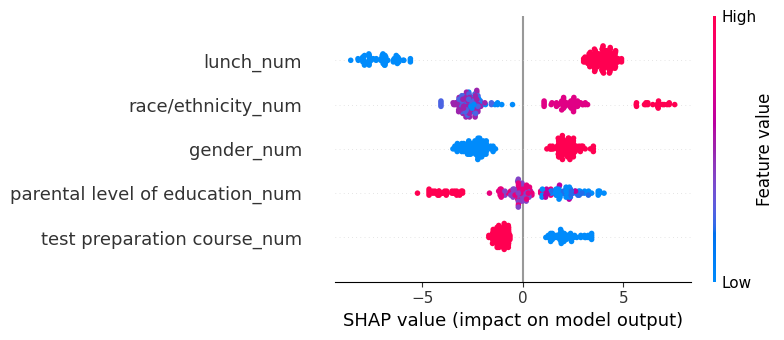

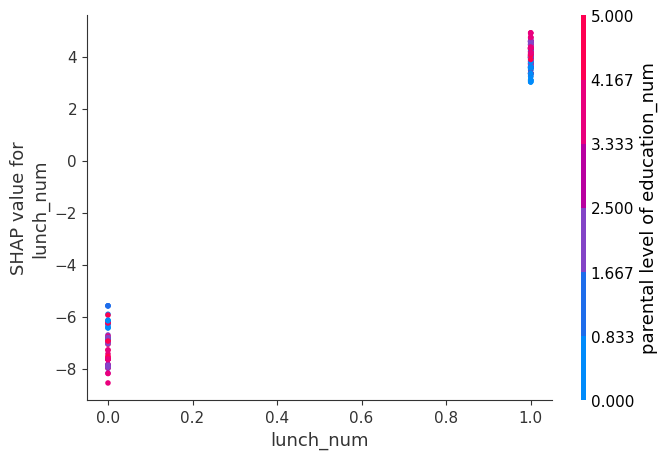

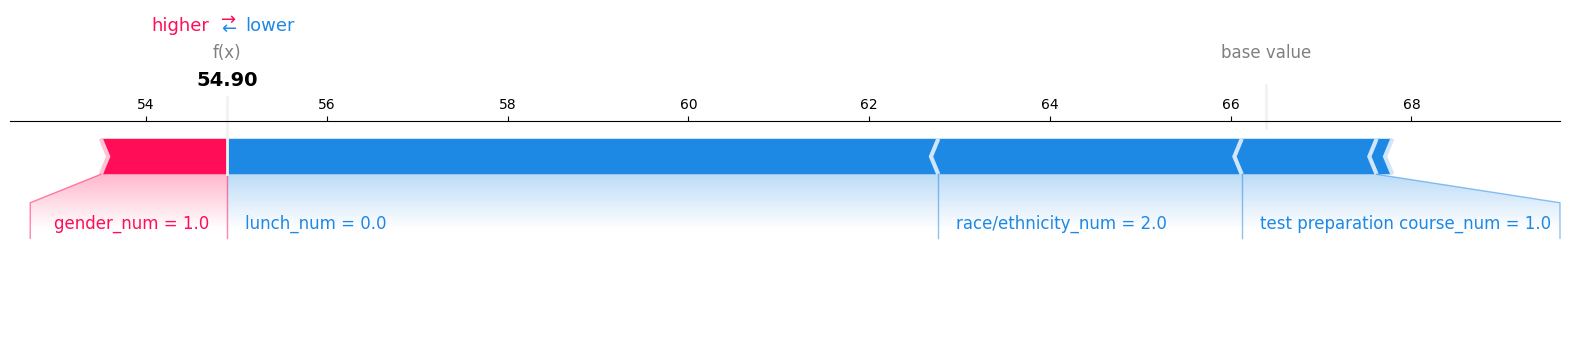

In [55]:
import numpy as np
import shap

# Assume you have: X_train, X_test, y_train, y_test
# and a fitted GridSearchCV called grid
best_model = math_grid_search.best_estimator_  # RandomForestClassifier or Regressor

# For tree models, TreeExplainer is fast & exact(ish)
explainer = shap.TreeExplainer(best_model)

# Use a modest background sample for speed
background = shap.sample(X_train, 100, random_state=42)

# Compute SHAP values on a sample (global plots) and a few rows (local)
X_sample = shap.sample(X_test, 500, random_state=42)
X_sample = X_sample.to_pandas()
print(type(X_sample))
shap_values = explainer.shap_values(X_sample)

# --- Global importance ---
# For classification with TreeExplainer: shap_values is a list per class; pick positive class (usually index 1)
if hasattr(best_model, "predict_proba"):
    sv_for_plot = shap_values[1] if isinstance(shap_values, list) else shap_values
else:
    sv_for_plot = shap_values

print(X_sample.columns)
shap.summary_plot(sv_for_plot, X_sample, feature_names=X_sample.columns)

# Dependence plot for a top feature
top_feature = X_sample.columns[np.argsort(np.abs(sv_for_plot).mean(0))[-1]]
shap.dependence_plot(top_feature, sv_for_plot, X_sample)

# --- Local explanation for one prediction ---
i = 0
X_test_pandas = X_test.to_pandas()
row = X_test_pandas.iloc[[i]]
sv_row = explainer.shap_values(row)
sv_row_pos = sv_row[1] if isinstance(sv_row, list) else sv_row
shap.force_plot(
    (
        explainer.expected_value[1]
        if isinstance(explainer.expected_value, list)
        else explainer.expected_value
    ),
    sv_row_pos,
    row,
    matplotlib=True,
)